<a href="https://colab.research.google.com/github/kendrahalle/Project_Full_Code_Notebook_EasyVisa/blob/main/KHL_Project_Full_Code_Notebook_EasyVisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Data Science and Business Analytics</font></center>
<center><font size=6>Ensemble Techniques and Model Tuning</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the dataset**

In [ ]:
visa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EasyVisa.csv')

In [ ]:
df = visa.copy()

# **Overview of the Dataset**

* Observations

* Sanity checks

# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**

What is the distribution of visa case statuses (certified vs. denied)?


1. What is the distribution of visa case statuses (certified vs. denied)?
2. How does the education level of employees impact visa approval rates?
3. Is there a significant difference in visa approval rates between employees with and without prior job experience?
4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?
5. Do certain regions in the US have higher visa approval rates compared to others?
6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?
7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
df.shape

(25480, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
df.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
df.loc[df['no_of_employees'] < 0].shape

(33, 12)

In [ ]:
df['no_of_employees'] = df['no_of_employees'].abs()

In [ ]:
cat_cols = list(df.select_dtypes('object').columns)

for col in cat_cols:
    print(df[col].value_counts())
    print("-" * 50)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [ ]:
df['case_id'].nunique()

25480

In [ ]:
df.drop(["case_id"], axis=1, inplace=True)

In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


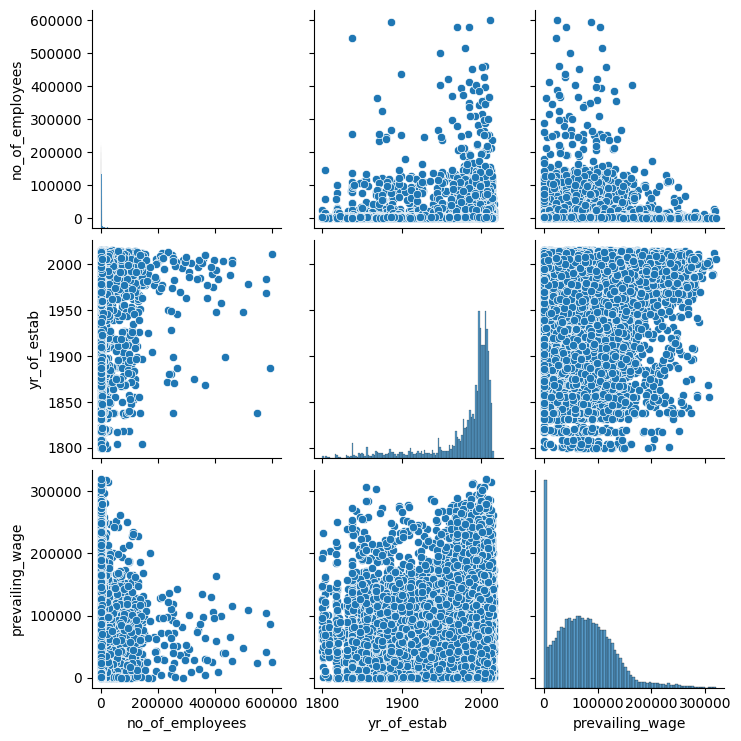

In [ ]:
sns.pairplot(df)

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

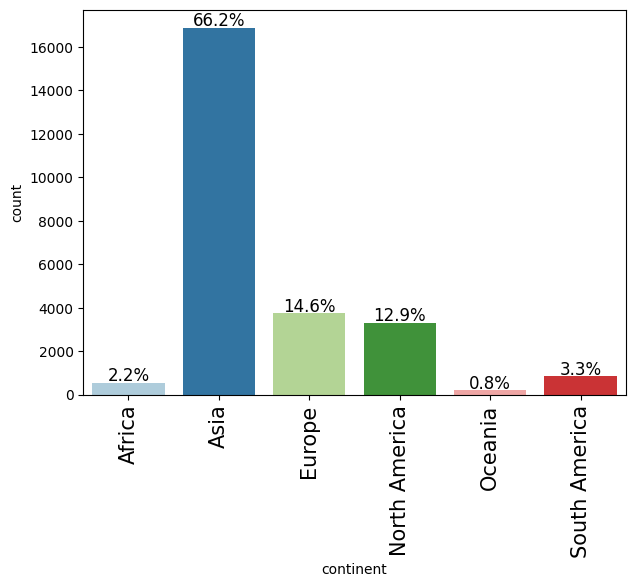

In [ ]:
labeled_barplot(df, 'continent', perc=True)

Asia is the most frequent continent.

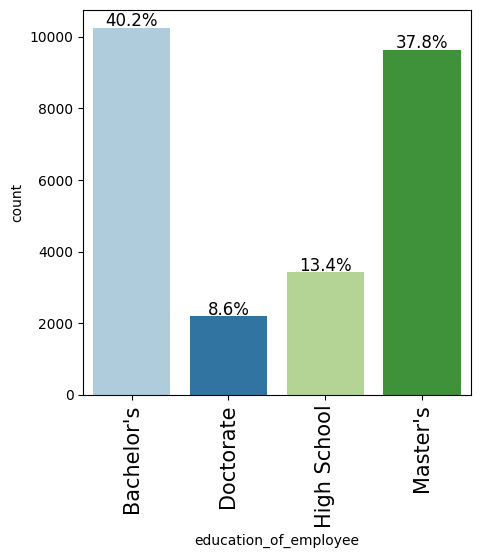

In [ ]:
labeled_barplot(df, 'education_of_employee', perc=True)

Most employees have an education level of either a Bachelor's or Master's.

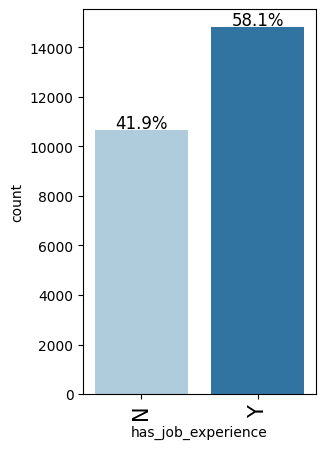

In [ ]:
labeled_barplot(df, 'has_job_experience', perc=True)

About 58% of employees have job experience.

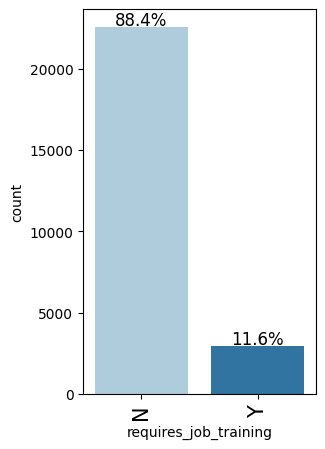

In [ ]:
labeled_barplot(df, 'requires_job_training', perc=True)

About 88% of the jobs do not require training.

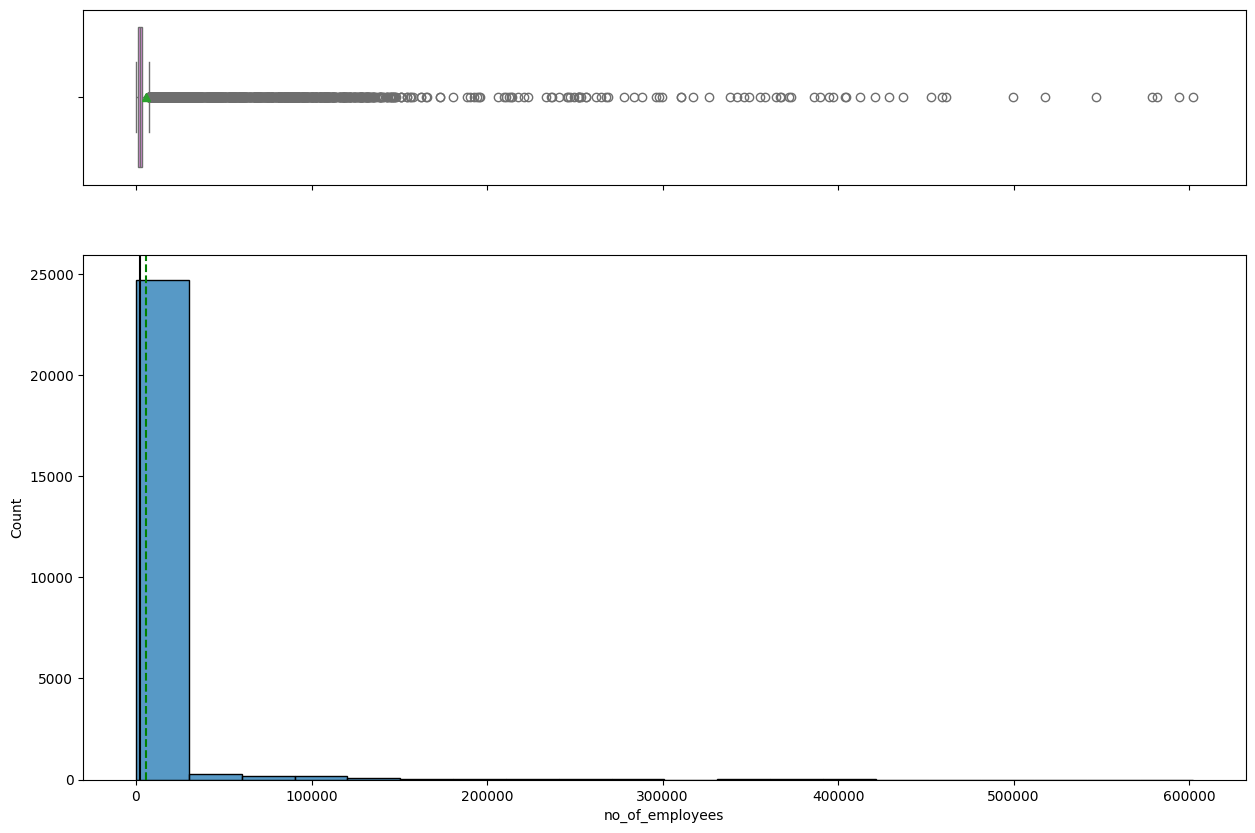

In [ ]:
histogram_boxplot(df, 'no_of_employees', bins = 20)

The number of employees has a skew to the right.

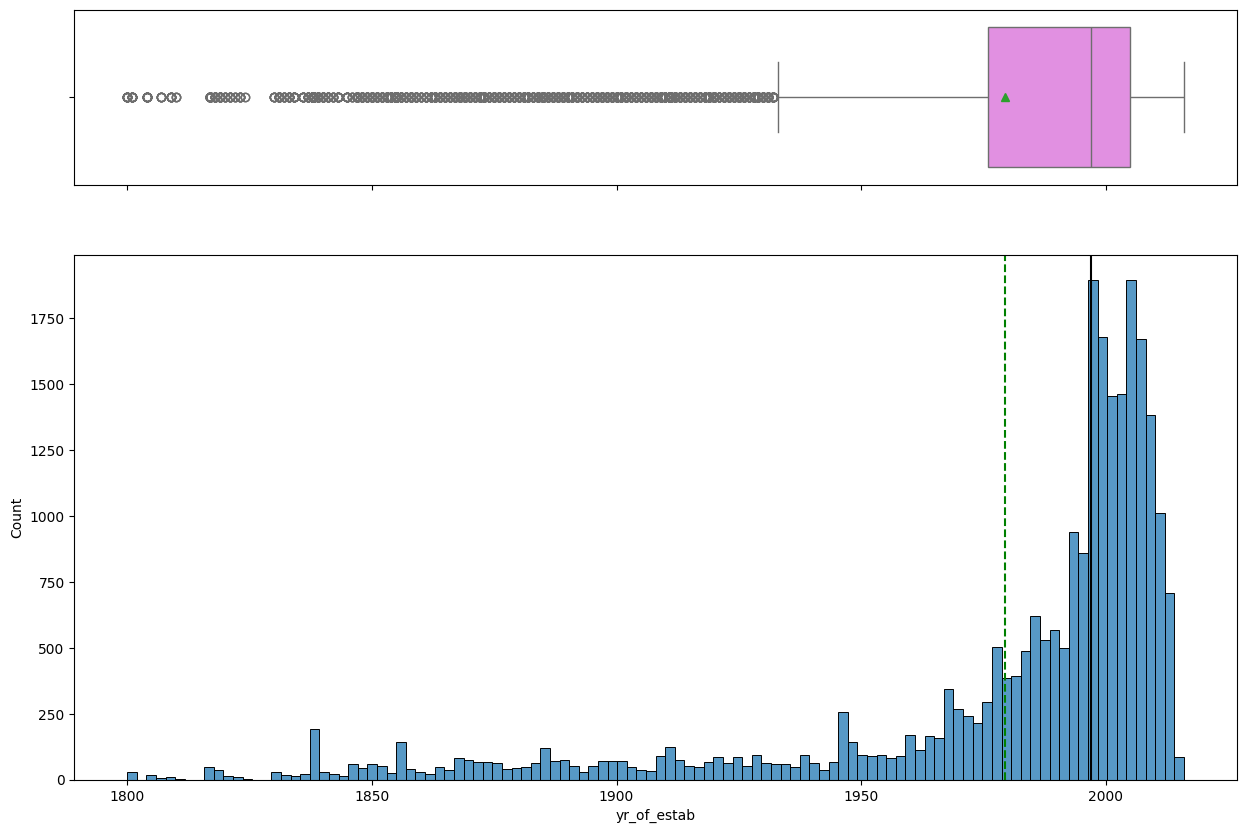

In [ ]:
histogram_boxplot(df, 'yr_of_estab')

The years of establishment have a left skew.

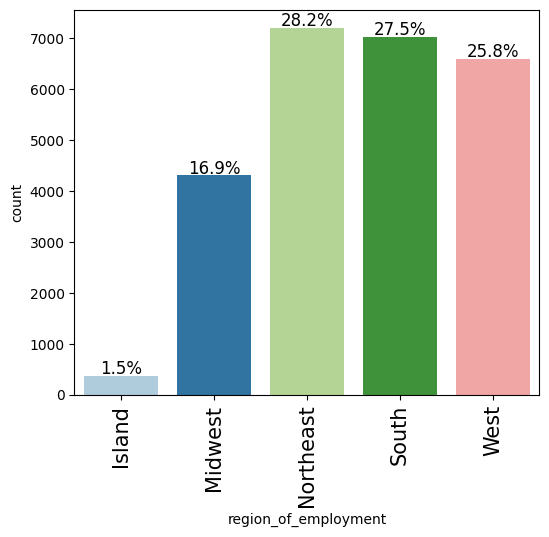

In [ ]:
labeled_barplot(df, 'region_of_employment', perc=True)

The region of employment is typically on the mainland.

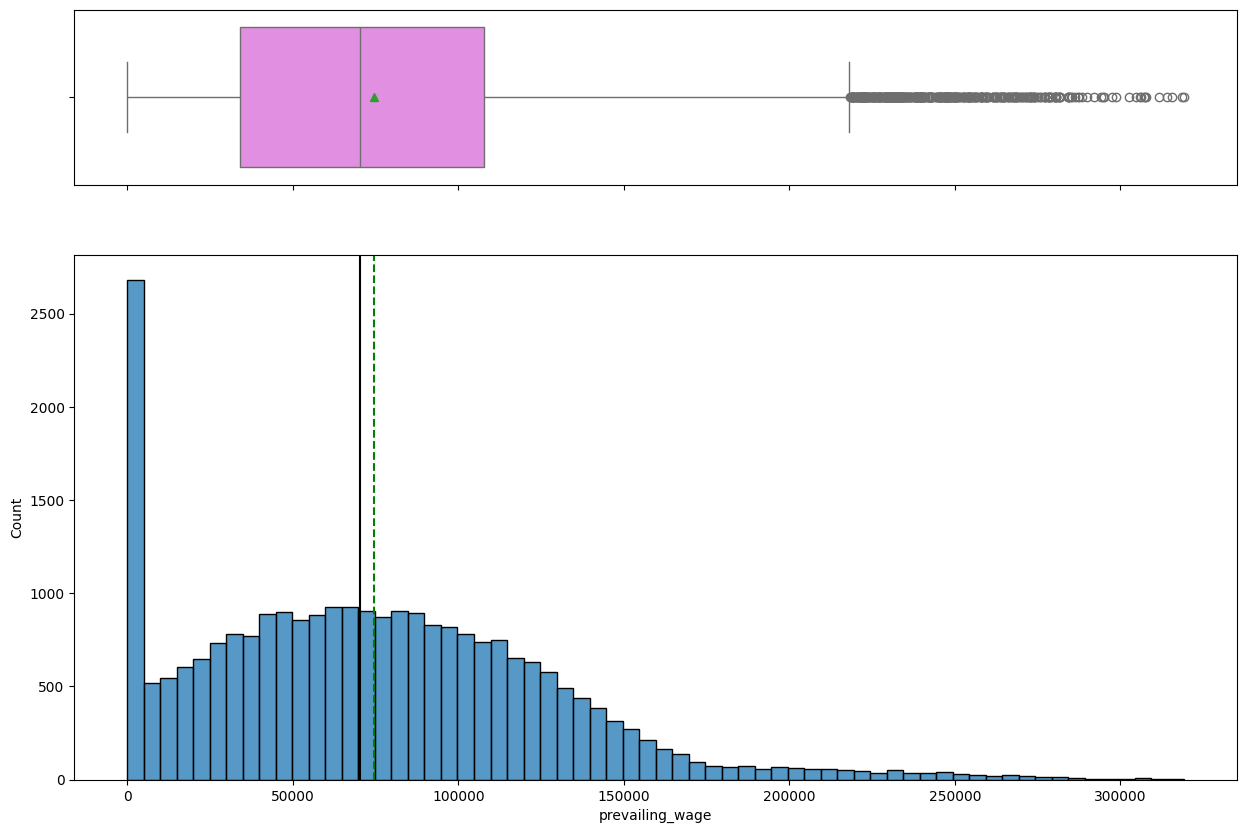

In [ ]:
histogram_boxplot(df, 'prevailing_wage')

Wages have a right skew.

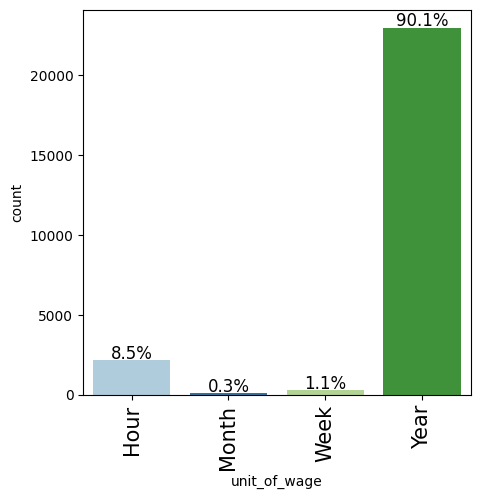

In [ ]:
labeled_barplot(df, 'unit_of_wage', perc=True)

Most employees (~90%) are paid yearly.

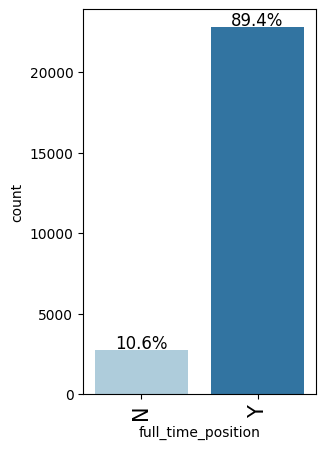

In [ ]:
labeled_barplot(df, 'full_time_position', perc=True)

Most employees (~89%) are in full time positions.

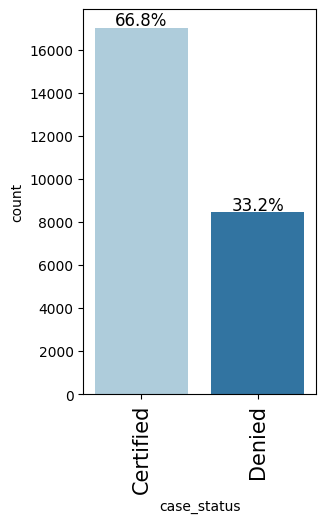

In [ ]:
labeled_barplot(df, 'case_status', perc=True)

66.8% of cases are certified.

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

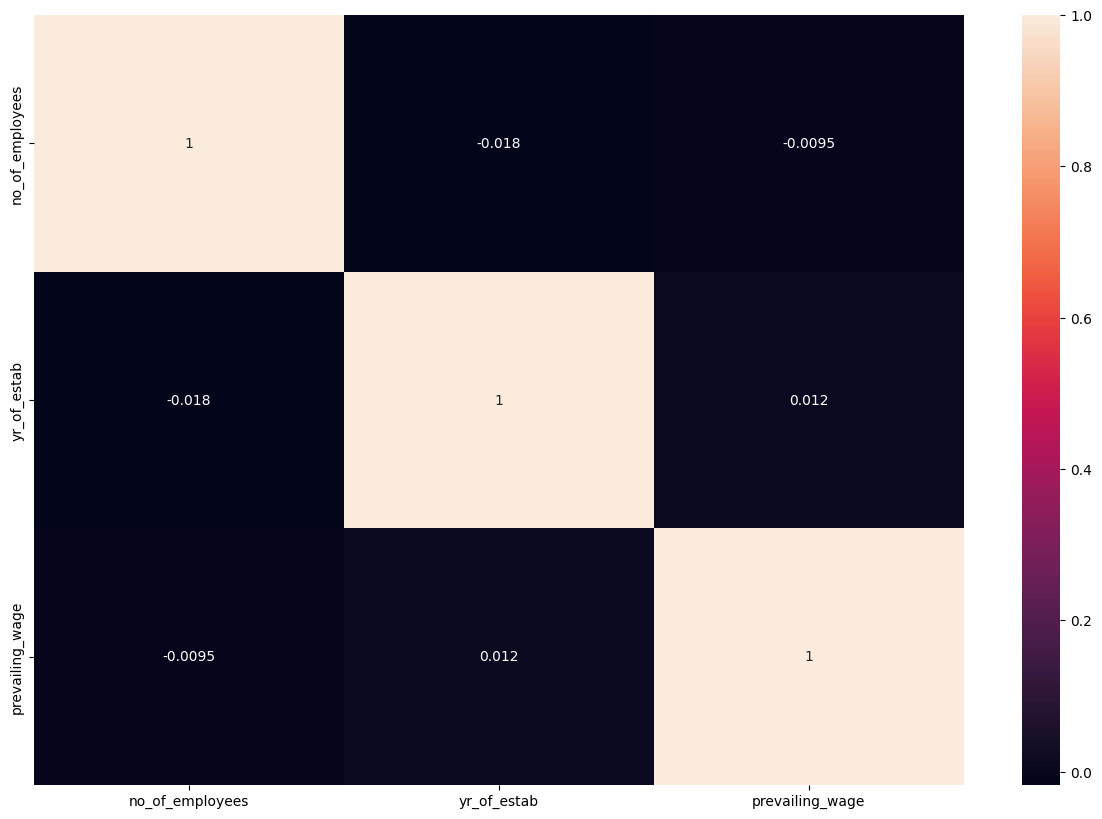

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.to_list()

plt.figure(figsize=(15, 10))
sns.heatmap(df[cols_list].corr(), annot=True)
plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


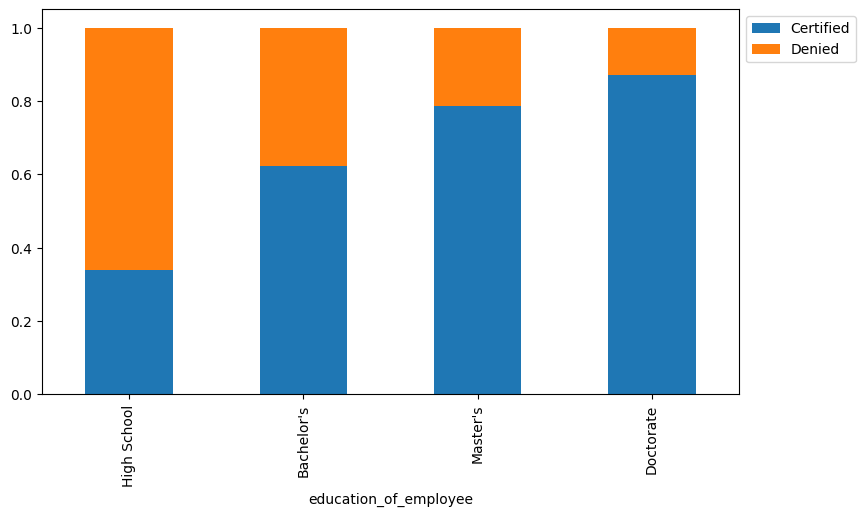

In [ ]:
stacked_barplot(df, 'education_of_employee', 'case_status')

It appears that the higher your education level, the more likely it is that the visa will be certified.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


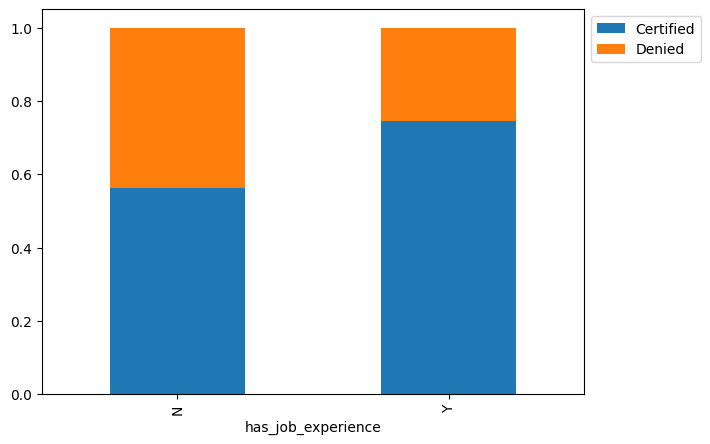

In [ ]:
stacked_barplot(df, 'has_job_experience', 'case_status')

It appears that prior job experience positively correlates with a certified visa.

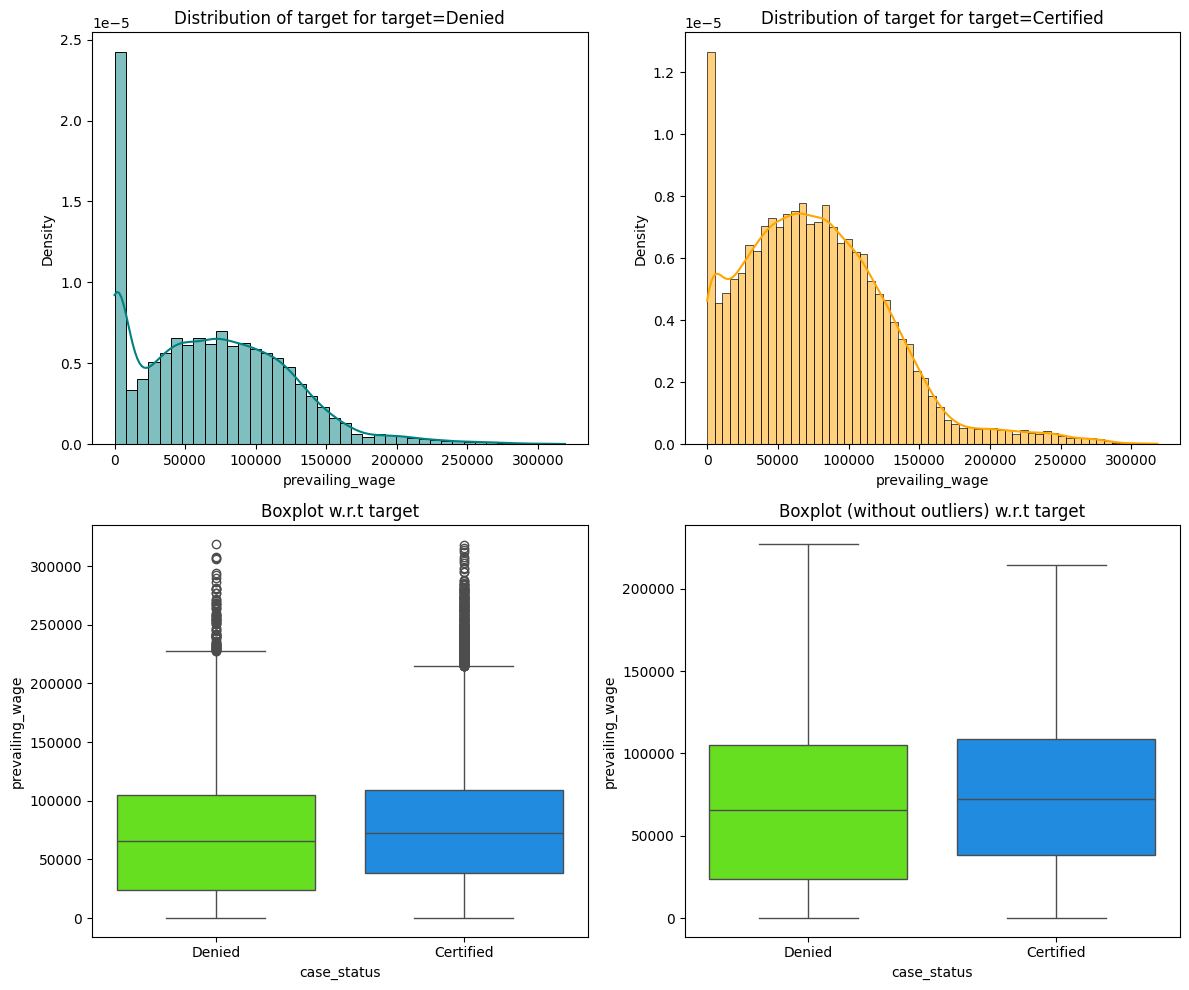

In [ ]:
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')

Prevailing wage and case status do not appear to have a correlation.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


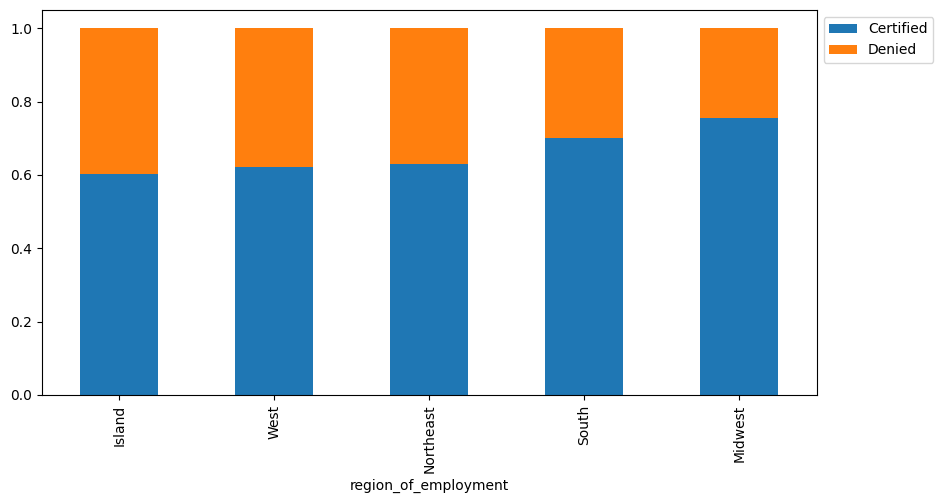

In [ ]:
stacked_barplot(df, 'region_of_employment', 'case_status')

Region of employment does not appear to have an impact of visa status but more investigation is needed.

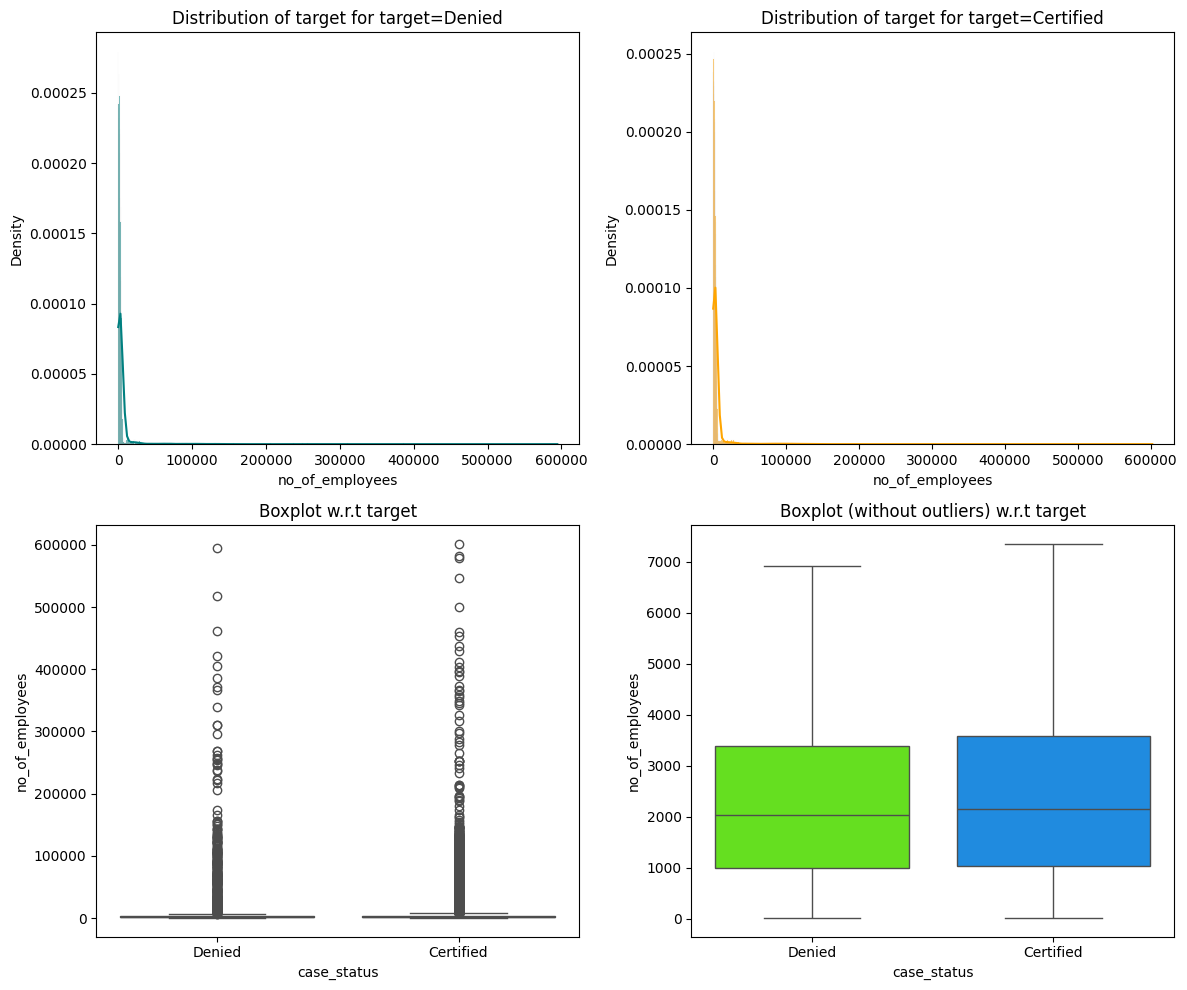

In [ ]:
distribution_plot_wrt_target(df, 'no_of_employees', 'case_status')

The number of employees does not seem to have an impact of case status.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


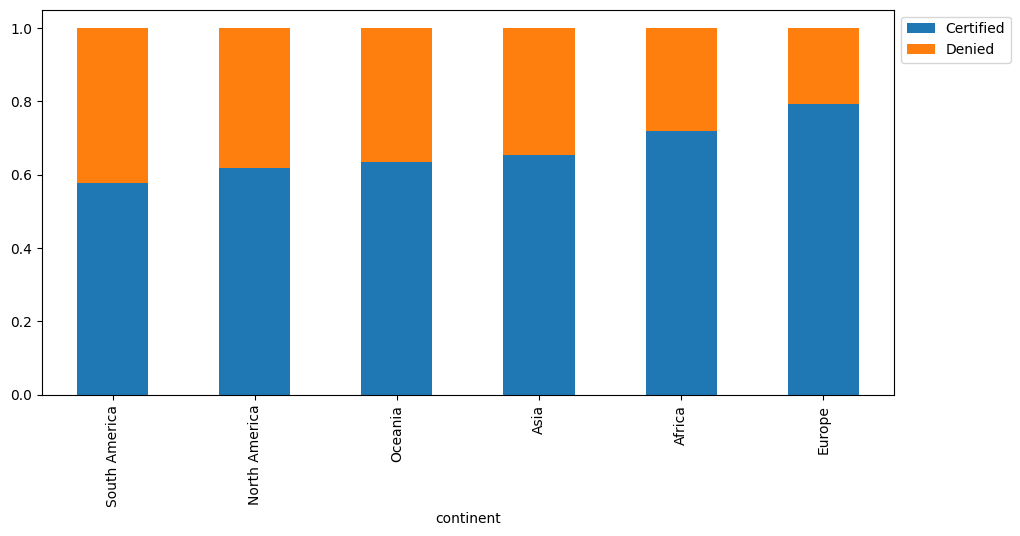

In [ ]:
stacked_barplot(df, 'continent', 'case_status')

The continent does not appear to have a major impact on case status but more investigation is needed.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


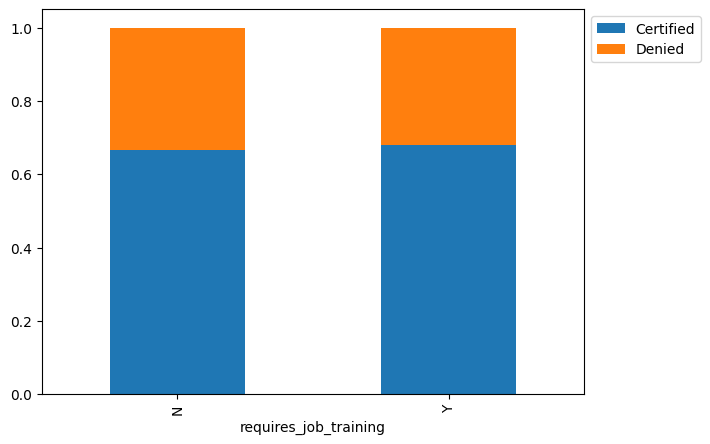

In [ ]:
stacked_barplot(df, 'requires_job_training', 'case_status')

Jobs that require training does not seem to have an impact on case status.

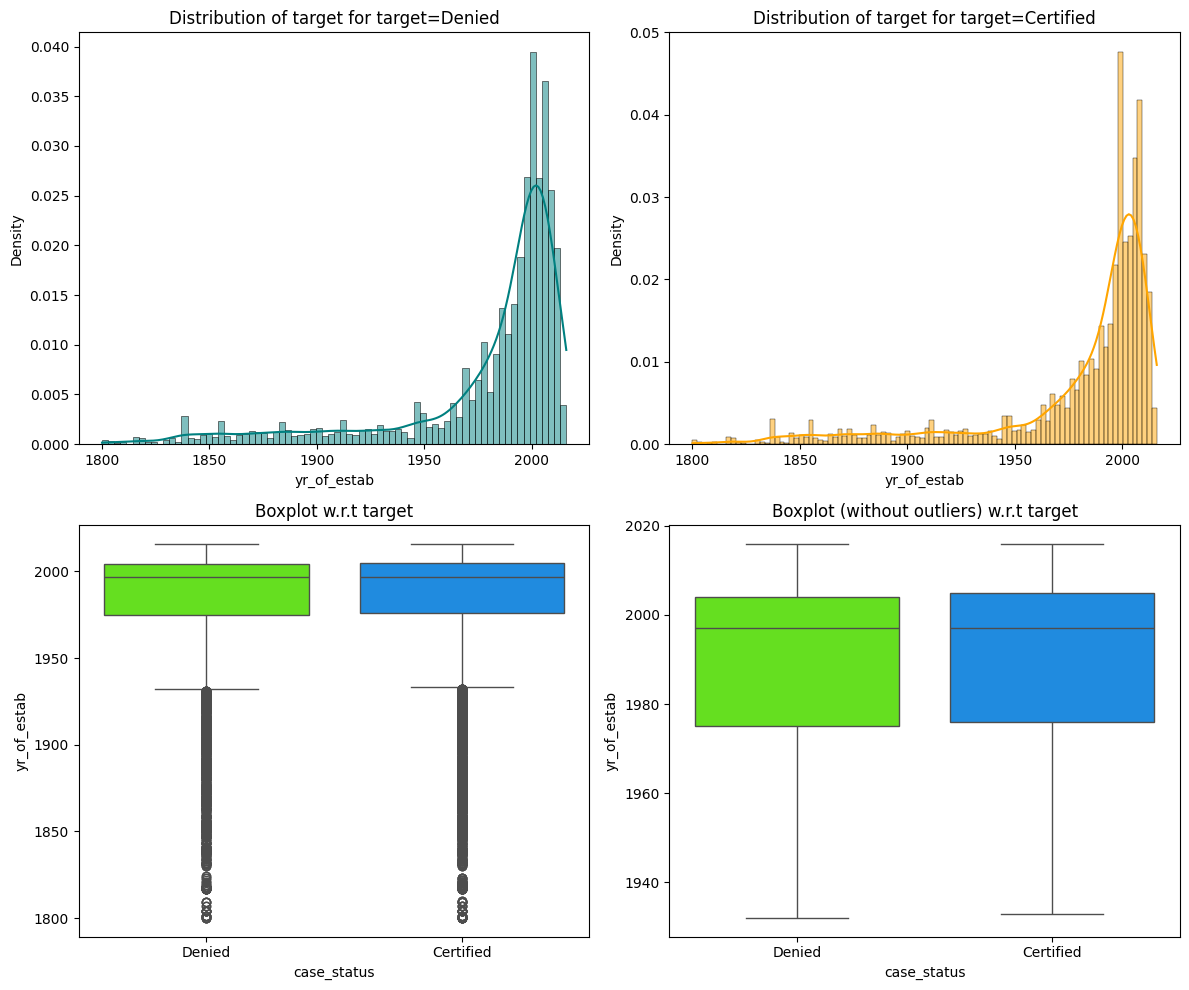

In [ ]:
distribution_plot_wrt_target(df, 'yr_of_estab', 'case_status')

The year of establishment and case status do not appear to have a correlation.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


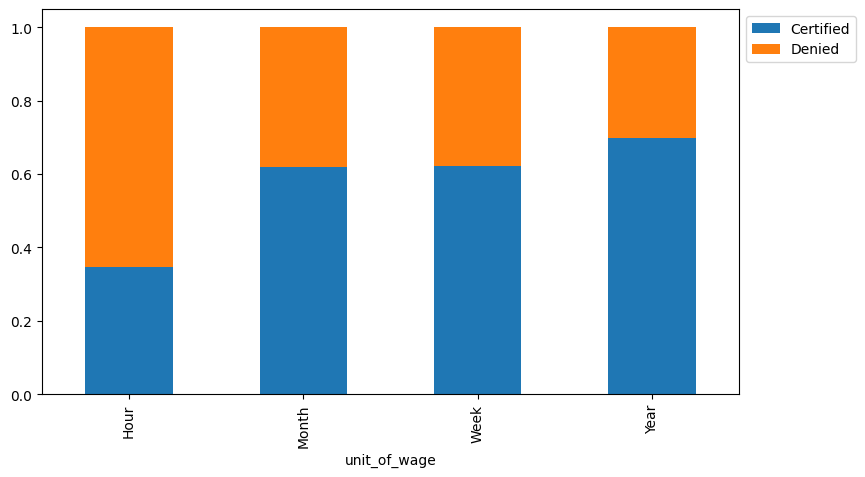

In [ ]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

While is appears that hourly employees are more likely to get denied, more investigation is needed.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


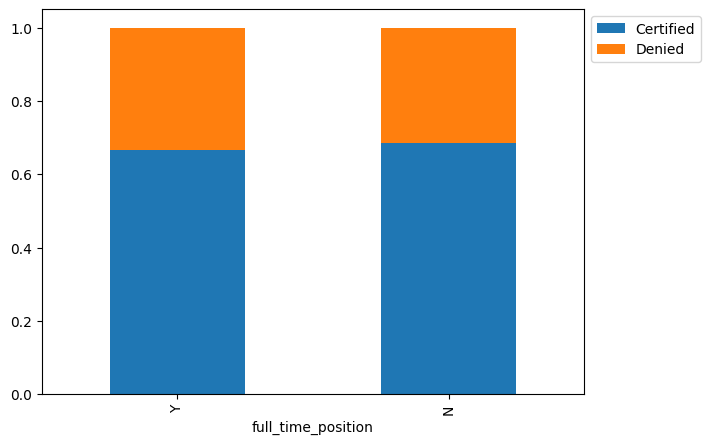

In [ ]:
stacked_barplot(df, 'full_time_position', 'case_status')

Full time status does not appear to have a correlation on case status.

# **Data Pre-processing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

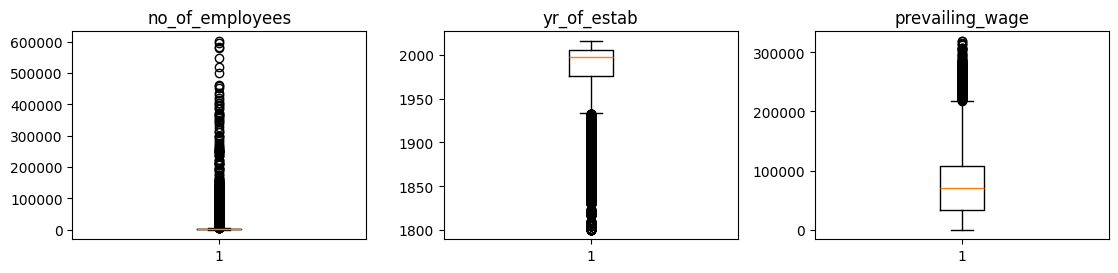

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = df.drop(["case_status"], axis=1)
y = df["case_status"]


X = pd.get_dummies(X, drop_first=True)

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [ ]:
print('Shape of Training set: ', X_train.shape)
print('Shape of Validation set: ', X_val.shape)
print('Shape of Test set: ', X_test.shape)
print('-' * 50)
print('Percentage of classes in training set: ')
print(y_train.value_counts(normalize=True))
print('-' * 50)
print('Percentage of classes in validation set: ')
print(y_val.value_counts(normalize=True))
print('-' * 50)
print('Percentage of classes in test set: ')
print(y_test.value_counts(normalize=True))

Shape of Training set:  (15288, 21)
Shape of Validation set:  (5096, 21)
Shape of Test set:  (5096, 21)
--------------------------------------------------
Percentage of classes in training set: 
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64
--------------------------------------------------
Percentage of classes in validation set: 
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64
--------------------------------------------------
Percentage of classes in test set: 
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


# **Model Building**

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)


    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Original Data

In [ ]:
models = []

models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []
names = []
score = []

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.989150179193873
Random forest: 1.0
GBM: 0.8289261156490839
Adaboost: 0.8204269947530306
Xgboost: 0.8955209982307477

Validation Performance:

Bagging: 0.7705640423031728
Random forest: 0.8301997649823737
GBM: 0.8742655699177438
Adaboost: 0.8807285546415982
Xgboost: 0.854289071680376


## Oversampled Data

In [ ]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label 'Certified': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label 'Denied': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label 'Certified': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label 'Denied': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label 'Certified': 10210
Before OverSampling, count of label 'Denied': 5078 

After OverSampling, count of label 'Certified': 10210
After OverSampling, count of label 'Denied': 10210 

After OverSampling, the shape of train_X: (20420, 21)
After OverSampling, the shape of train_y: (20420,) 



In [ ]:
models = []

models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []
names = []
score = []

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9873554735547355
Random forest: 0.9999510308016257
GBM: 0.8049819427724789
Adaboost: 0.8005498403689252
Xgboost: 0.875256386350923

Validation Performance:

Bagging: 0.7511750881316098
Random forest: 0.8131609870740305
GBM: 0.8448883666274971
Adaboost: 0.882491186839013
Xgboost: 0.8457696827262045


## Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, count of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label 'Denied': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label 'Certified': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label 'Denied': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label 'Certified': 10210
Before Under Sampling, count of label 'Denied': 5078 

After Under Sampling, count of label 'Certified': 5078
After Under Sampling, count of label 'Denied': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [ ]:
models = []

models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []
names = []
score = []

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9803687095166915
Random forest: 1.0
GBM: 0.7280390842034677
Adaboost: 0.7015343047380103
Xgboost: 0.8723508155093271

Validation Performance:

Bagging: 0.6178025851938895
Random forest: 0.6742068155111633
GBM: 0.7320799059929495
Adaboost: 0.7159224441833137
Xgboost: 0.6850763807285546


# **Model Performance Improvement**

## **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```


## Random Forest

In [ ]:
%%time
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
                'max_depth': list(np.arange(5,15,5)),
                'max_features': ['sqrt','log2'],
                'min_samples_split': np.arange(3, 5, 7),
                'n_estimators': np.arange(10, 40, 10)}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

CPU times: user 21.3 s, sys: 48 ms, total: 21.3 s
Wall time: 25.5 s


RandomForestClassifier(max_depth=np.int64(10), min_samples_split=np.int64(3),
                       n_estimators=np.int64(20), oob_score=True,
                       random_state=1)

Training performance:
    Accuracy   Recall  Precision       F1
0  0.776949  0.90382   0.791695  0.84405
--------------------------------------------------


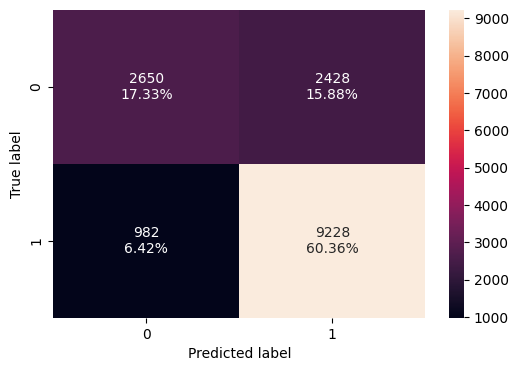

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
print('-' * 50)

confusion_matrix_sklearn(rf_tuned, X_train, y_train)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.748038  0.878085   0.774754  0.823189
--------------------------------------------------


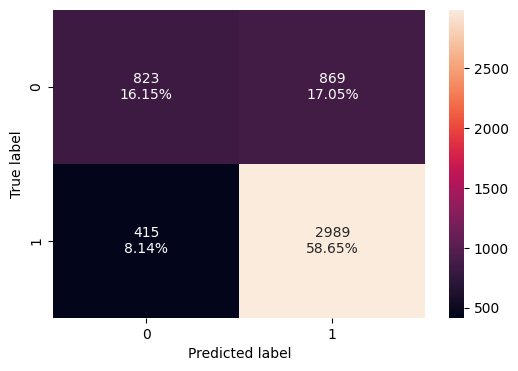

In [ ]:
rf_tuned_model_val_perf=model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:\n",rf_tuned_model_val_perf)
print('-' * 50)

confusion_matrix_sklearn(rf_tuned, X_val, y_val)

## AdaBoost Classifier

In [ ]:
%%time
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, y_train)

CPU times: user 2min 54s, sys: 369 ms, total: 2min 55s
Wall time: 2min 58s


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=np.int64(100),
                   random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.749346  0.874437   0.777836  0.823312
--------------------------------------------------


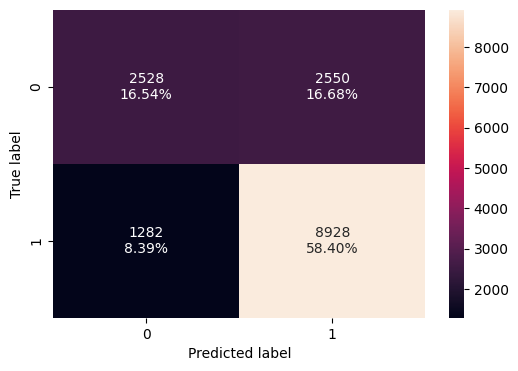

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n",abc_tuned_model_train_perf)
print('-' * 50)

confusion_matrix_sklearn(abc_tuned, X_train, y_train)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.750981  0.870447   0.781588  0.823628
--------------------------------------------------


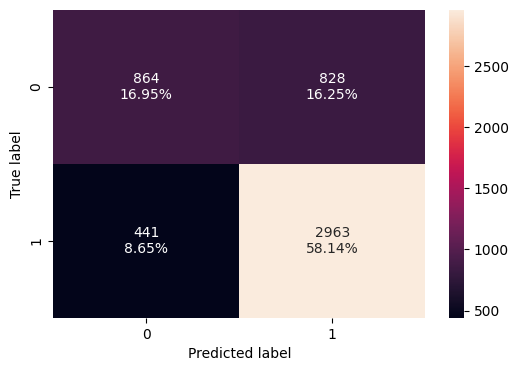

In [ ]:
abc_tuned_model_val_perf=model_performance_classification_sklearn(abc_tuned, X_val, y_val)
print("Validation performance:\n",abc_tuned_model_val_perf)
print('-' * 50)

confusion_matrix_sklearn(abc_tuned, X_val, y_val)

## Gradient Boosting Classifier

In [ ]:
%%time
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_

gbc_tuned.fit(X_train, y_train)

CPU times: user 10min 47s, sys: 1.71 s, total: 10min 49s
Wall time: 11min 16s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=np.int64(50), random_state=1,
                           subsample=0.7)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.749804  0.899119   0.766597  0.827586
--------------------------------------------------


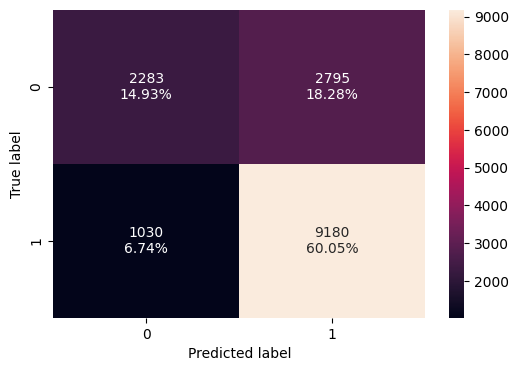

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n", gbc_tuned_model_train_perf)
print('-' * 50)

confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.749019  0.897474   0.766625  0.826905
--------------------------------------------------


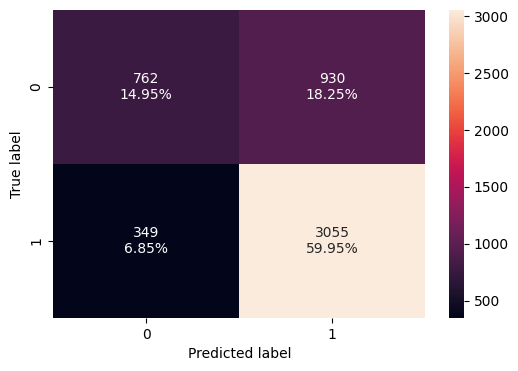

In [ ]:
gbc_tuned_model_val_perf=model_performance_classification_sklearn(gbc_tuned, X_val, y_val)
print("Validation performance:\n",gbc_tuned_model_val_perf)
print('-' * 50)

confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

## XGBoost Classifier

In [ ]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(50), n_jobs=None, num_parallel_tree=None,
              random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.760597  0.886876   0.783304  0.831879
--------------------------------------------------


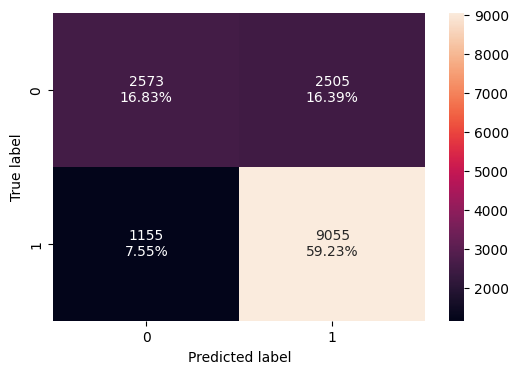

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n", xgb_tuned_model_train_perf)
print('-' * 50)

confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.752355  0.877791   0.779343  0.825642
--------------------------------------------------


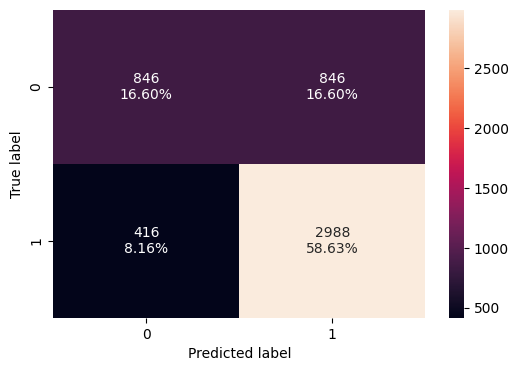

In [ ]:
xgb_tuned_model_val_perf=model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation performance:\n",xgb_tuned_model_val_perf)
print('-' * 50)

confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

# **Model Comparison and Final Model Selection**

In [ ]:
models_train_comp_df = pd.concat(
    [   rf_tuned_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Random Forest",
    "Tuned Adaboost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier Tuned",]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned Random Forest,Tuned Adaboost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier Tuned
Accuracy,0.776949,0.749346,0.749804,0.760597
Recall,0.903820,0.874437,0.899119,0.886876
Precision,0.791695,0.777836,0.766597,0.783304
F1,0.844050,0.823312,0.827586,0.831879


In [ ]:
models_val_comp_df = pd.concat(
    [   rf_tuned_model_val_perf.T,
        abc_tuned_model_val_perf.T,
        gbc_tuned_model_val_perf.T,
        xgb_tuned_model_val_perf.T,],
    axis=1,
)
models_val_comp_df.columns = [
    "Tuned Random Forest",
    "Tuned Adaboost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier Tuned",]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Tuned Random Forest,Tuned Adaboost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier Tuned
Accuracy,0.748038,0.750981,0.749019,0.752355
Recall,0.878085,0.870447,0.897474,0.877791
Precision,0.774754,0.781588,0.766625,0.779343
F1,0.823189,0.823628,0.826905,0.825642


In [ ]:
Model_test = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
Model_test

,Accuracy,Recall,Precision,F1
0,0.744898,0.881904,0.769744,0.822015


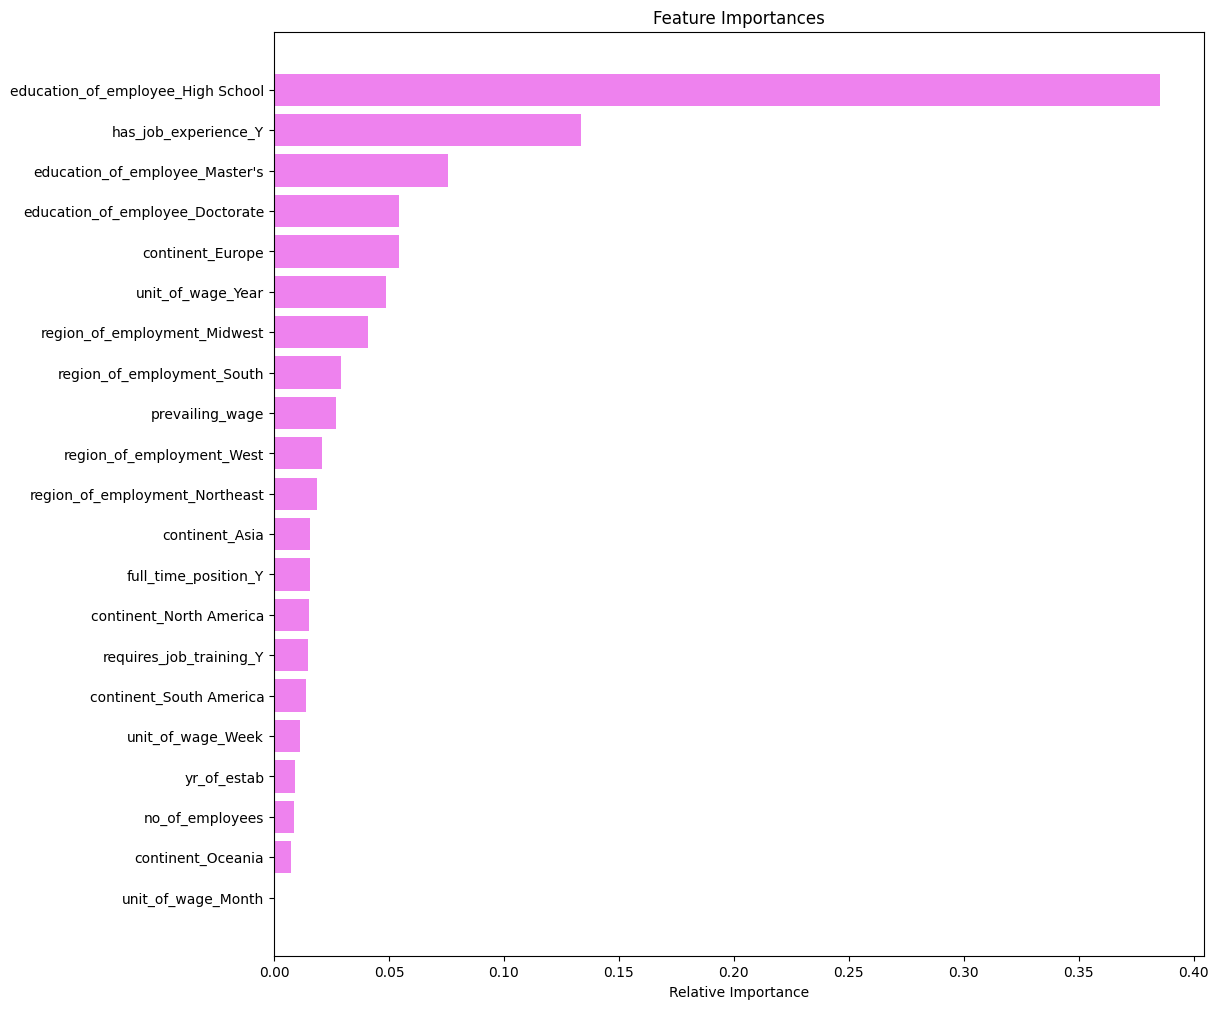

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **Actionable Insights and Recommendations**

**Actionable Insights**
* Applicants with a higher education are more likely to be appoved.
* Applicants with only a high school level of education are more likely to be denied during the visa process.
* Applicants with previous job experience are more likely to be certified during the visa process.


**Recommendations**
* Prioritize applicants with advanced degrees and previous job experience.
* Auto-flag applicants without job experience and with only a high school education.

___